In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [59]:
files = [file for file in os.listdir('./Sales_Data/')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [106]:
All_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(os.path.join('./Sales_Data/',file))
    All_data = pd.concat([All_data,df])

In [107]:
All_data = All_data.dropna(how='all')

In [108]:
All_data = All_data[All_data['Order Date'].str[0:2]!='Or']

In [109]:
All_data['Quantity Ordered'] = pd.to_numeric(All_data['Quantity Ordered'])
All_data['Price Each'] = pd.to_numeric(All_data['Price Each'])

In [110]:
All_data["Year"] = All_data["Order Date"].apply(lambda x : str(x)[-8:-6]).astype(str).astype(int)
All_data["month"] = All_data["Order Date"].apply(lambda x : str(x)[-14:-12]).astype(str).astype(int)
All_data["day"] = All_data["Order Date"].apply(lambda x : str(x)[-11:-9]).astype(str).astype(int)

#All_data['ds'] = pd.DatetimeIndex(All_data["Year"] +"-"+ All_data["month"] +"-"+ All_data["day"])
All_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Year                  int32
month                 int32
day                   int32
dtype: object

In [111]:
All_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,month,day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",19,4,7
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",19,4,12
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",19,4,12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",19,4,30
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",19,9,17
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",19,9,1
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",19,9,23
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",19,9,19


In [112]:
All_data['Sales'] = All_data['Quantity Ordered'] * All_data['Price Each']

In [113]:
All_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,month,day,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",19,4,7,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",19,4,12,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",19,4,12,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",19,4,30,11.99
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",19,9,17,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",19,9,1,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",19,9,23,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",19,9,19,379.99


#### Question: What was the best month for sales? How much was earned that month?

In [126]:
results_month = All_data.groupby('month').sum()
results_month

,Quantity Ordered,Price Each,Year,day,Sales
month,,,,,
1,10903,1811768.38,184505,155814,1822256.73
2,13449,2188884.72,227525,174408,2202022.42
3,17005,2791207.83,287907,241774,2807100.38
4,20558,3367671.02,347301,282960,3390670.24
5,18667,3135125.13,314754,264875,3152606.75
6,15253,2562025.61,257526,209880,2577802.26
7,16072,2632539.56,271567,227910,2647775.76
8,13448,2230345.42,227259,192315,2244467.88
9,13109,2084992.09,220799,180101,2097560.13


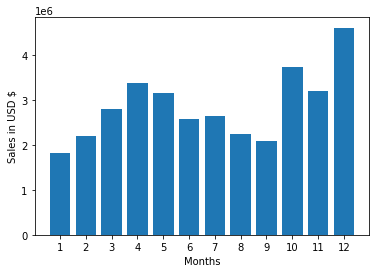

In [120]:
results_month = All_data.groupby('month').sum()

months = range(1,13)

plt.bar(months,results_month['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Months')

plt.show()

#### Question: What US city has the highest number of sales?

In [115]:
All_data["Purchase Address"].apply(lambda x : x.split(',')[1]).astype(str)

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
11681       Los Angeles
11682     San Francisco
11683     San Francisco
11684     San Francisco
11685     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [118]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#All_data["City"] = All_data["Purchase Address"].apply(lambda x : get_city(x) + ' (' + get_state(x) +')').astype(str)
All_data["City"] = All_data["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})").astype(str)
All_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,month,day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19,4,19,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",19,4,7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",19,4,12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",19,4,12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",19,4,30,11.99,Los Angeles (CA)


In [121]:
results_city = All_data.groupby('City').sum()
results_city

,Quantity Ordered,Price Each,Year,month,day,Sales
City,,,,,,
Atlanta (GA),16602,2779908.20,282739,104794,234837,2795498.58
Austin (TX),11153,1809873.61,188197,69829,156782,1819581.75
Boston (MA),22528,3637409.77,378750,141112,312376,3661642.01
Dallas (TX),16730,2752627.82,281582,104620,234435,2767975.40
Los Angeles (CA),33289,5421435.23,562496,208325,469607,5452570.80
New York City (NY),27932,4635370.83,472654,175741,392706,4664317.43
Portland (ME),2750,447189.25,46645,17144,38288,449758.27
Portland (OR),11303,1860558.22,190192,70621,159233,1870732.34
San Francisco (CA),50239,8211461.74,849920,315520,702669,8262203.91


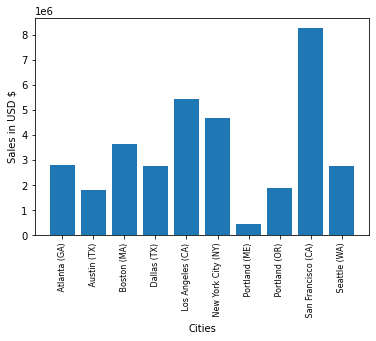

In [124]:
#cities = All_data['City'].unique()

#we need to make the cities in the same order as the sales for consistency

cities = [city for city,df in All_data.groupby('City')]

plt.bar(cities,results_city['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('Cities')

plt.show()

#### What time should we display advertisments to maximize likelihood of customer's buying product?

In [127]:
# we need to get the distribution over the 24 hour period
# we need to convert order_date into datetime type

All_data['Order Date']= pd.to_datetime(All_data['Order Date'])
All_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,month,day,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,19,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",19,4,7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",19,4,12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",19,4,12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",19,4,30,11.99,Los Angeles (CA)


In [129]:
All_data['Hour'] = All_data['Order Date'].dt.hour
All_data['Minute'] = All_data['Order Date'].dt.minute
All_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,month,day,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,19,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",19,4,7,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",19,4,12,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",19,4,12,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",19,4,30,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",19,9,17,8.97,Los Angeles (CA),20,56
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",19,9,1,700.00,San Francisco (CA),16,0
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",19,9,23,700.00,San Francisco (CA),7,39
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",19,9,19,379.99,San Francisco (CA),17,30


InvalidIndexError: (slice(None, None, None), None)

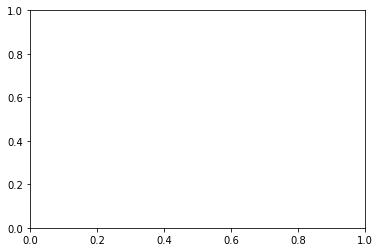

In [145]:
# Figuring out the best time
hours = [hour for hour, df in All_data.groupby(['Hour'])]
dff = All_data.groupby(['Hour']).count()
plt.plot(hours , dff)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hours)
plt.grid()
plt.show()

In [136]:
All_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,month,day,Sales,City,Minute
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


#### Whats products are most often sold together?

In [150]:
# if the have the same order id as well as the same address of shipping
df = All_data[All_data['Order ID'].duplicated(keep=False)]

df['Grouped_orders'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped_orders']].drop_duplicates()
df

C:\Users\aalah\AppData\Local\Temp/ipykernel_33416/4221472682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped_orders'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped_orders
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [153]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped_orders']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#count.most_common(10)

for key , value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? why do you think it sold the most?

In [154]:
# we need to sum up the Quantity ordered based on the product ordered

product_group = All_data.groupby(['Product'])
product_group.sum()

,Quantity Ordered,Price Each,Year,month,day,Sales,Hour,Minute
Product,,,,,,,,
20in Monitor,4129,451068.99,77921,29336,64237,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,118371,44440,97624,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,142636,52558,117702,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,117439,43304,97726,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,390963,145558,325504,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,392182,146370,326283,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,295435,109477,244828,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,253178,94113,210543,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,91201,34224,75959,1445700.00,68815,142789


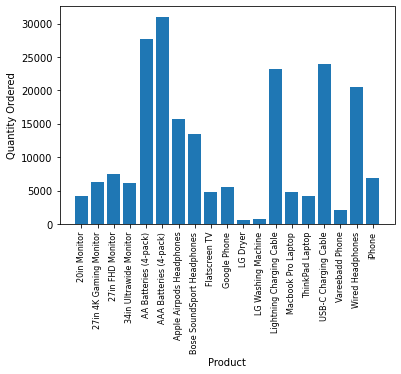

In [160]:
quantity_ordered= product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

***why do you think it sold the most?***


based on the plot the most sold item is AAA batteries, this comes to the fact that it's the cheapest item.

to chech we run the following:

In [162]:
prices = All_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\aalah\AppData\Local\Temp/ipykernel_33416/3740895298.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


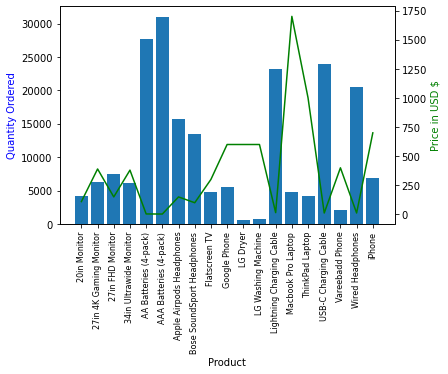

In [167]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,'g-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered',color='b')
ax2.set_ylabel('Price in USD $',color='g')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()

***Conclusion***

The price and the quantity ordered kind of correlate in the sens that, whenever the quantity ordered is high , the price is low, and vice versa for instance the AAA batteries and the MacBook Pro Laptop.

However, some inconsistencies still exist. For example the LG dryer and the MacBook , it can be explained by the fact that there is a high demand for MacBooks as they're more students and people purchasing it as opposed to LG driers.